In [16]:
# BLOQUE 1: Limpieza y Construcción del Año Típico (TMY)

import pandas as pd
import os

# Cargar el archivo
ruta_archivo = '/home/miguelo/datasciencesolar/MiguelOlivares/antofagasta_dirty.csv'
df_dirty = pd.read_csv(ruta_archivo)

# Crear columna Timestamp
df_dirty['Timestamp'] = pd.to_datetime(df_dirty[['Year', 'Month', 'Day', 'Hour', 'Minute']])

# Definir columnas a trabajar
columnas = ['GHI', 'DNI', 'DHI', 'Tdry', 'Tdew', 'RH', 'Pres', 'Wspd', 'Wdir', 'Snow Depth']

# Asegurar que las columnas son numéricas
df_dirty[columnas] = df_dirty[columnas].apply(pd.to_numeric, errors='coerce')

# --- Corrección de valores físicos ---
df_dirty['GHI'] = df_dirty['GHI'].clip(lower=0, upper=1500)
df_dirty['DNI'] = df_dirty['DNI'].clip(lower=0, upper=1500)
df_dirty['DHI'] = df_dirty['DHI'].clip(lower=0, upper=1500)

# --- Interpolación lineal ---
df_dirty[columnas] = df_dirty[columnas].interpolate(method='linear')
df_dirty[columnas] = df_dirty[columnas].fillna(method='bfill').fillna(method='ffill')

# --- CREAR EL AÑO TÍPICO COMPLETO ---
# Crear un rango de tiempo 8760 horas (año 2000)
tmy_tiempo = pd.date_range(start='2000-01-01 00:00', end='2000-12-31 23:00', freq='H')

# Crear DataFrame vacío
df_tmy = pd.DataFrame({'Timestamp': tmy_tiempo})

# Asignar datos existentes (ajustar tamaño)
for col in ['GHI', 'DNI', 'DHI', 'Tdry', 'Tdew', 'RH', 'Pres', 'Wspd', 'Wdir', 'Snow Depth']:
    if len(df_dirty) >= len(df_tmy):
        df_tmy[col] = df_dirty[col].iloc[:len(df_tmy)].values
    else:
        df_tmy[col] = df_dirty[col].values.tolist() + [0]*(len(df_tmy)-len(df_dirty))

# Rellenar posibles NaNs
df_tmy.fillna(0, inplace=True)

# Guardar el archivo limpio y estructurado como TMY
ruta_guardado = '/home/miguelo/CLASE 3/antofagasta_tmy.csv'
df_tmy.to_csv(ruta_guardado, index=False)

print("✅ Archivo limpio y estructurado como TMY guardado en:", ruta_guardado)


✅ Archivo limpio y estructurado como TMY guardado en: /home/miguelo/CLASE 3/antofagasta_tmy.csv


/tmp/ipykernel_17147/2004728169.py:26: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_dirty[columnas] = df_dirty[columnas].fillna(method='bfill').fillna(method='ffill')
/tmp/ipykernel_17147/2004728169.py:30: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  tmy_tiempo = pd.date_range(start='2000-01-01 00:00', end='2000-12-31 23:00', freq='H')


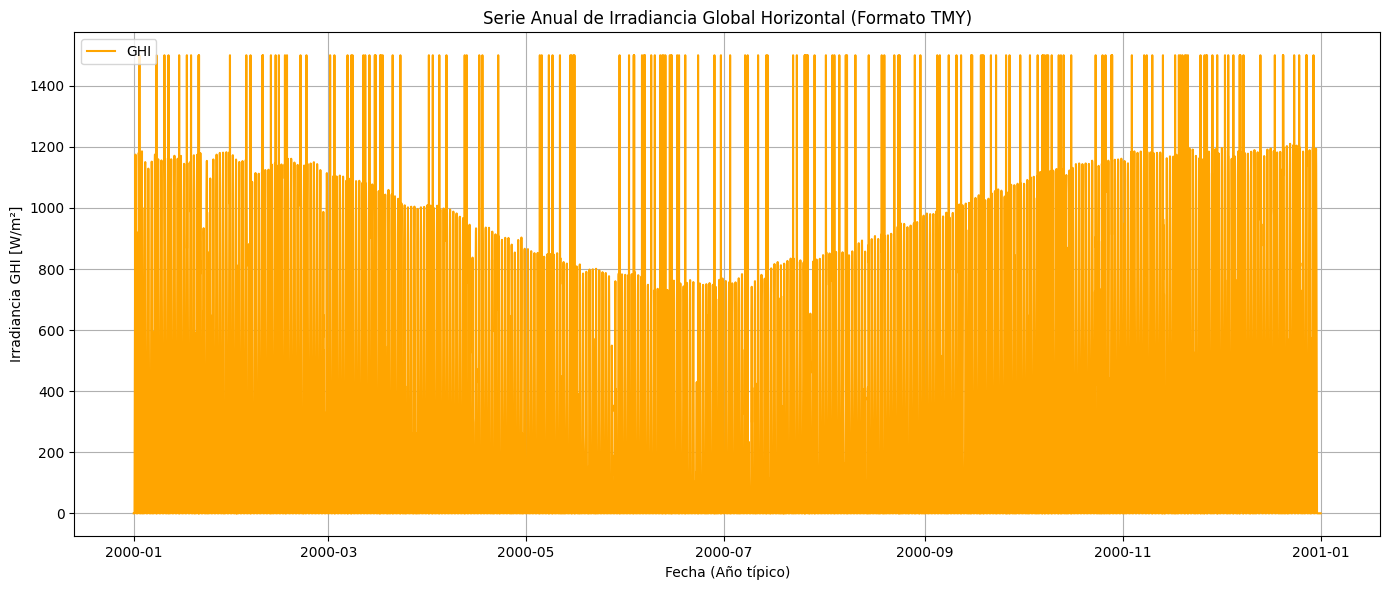

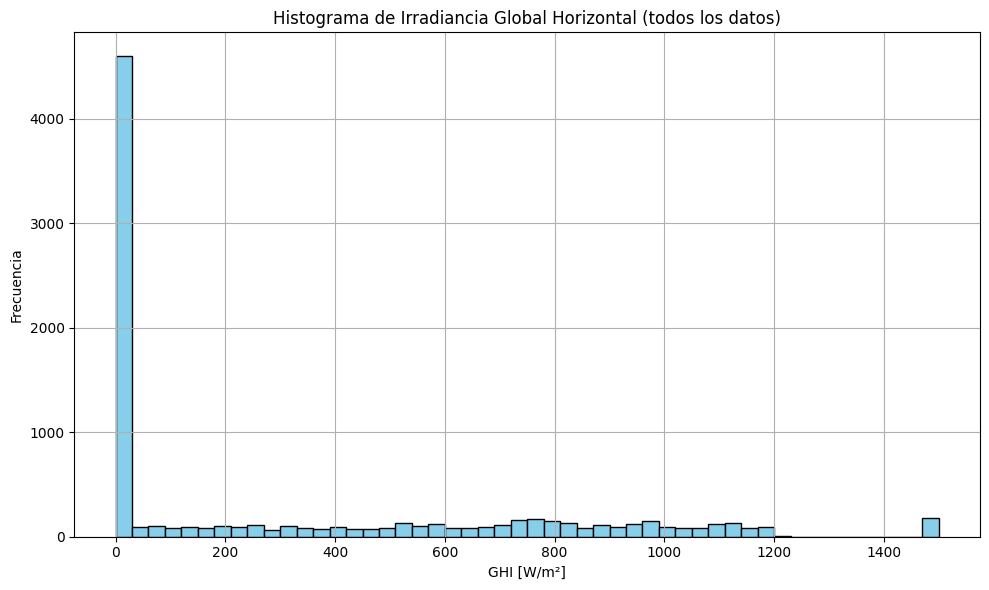

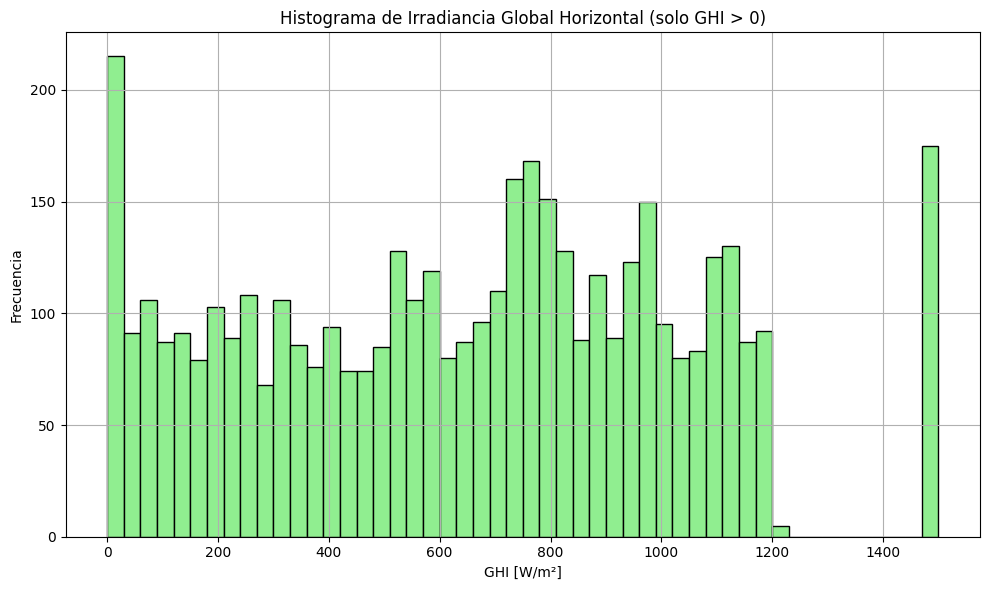

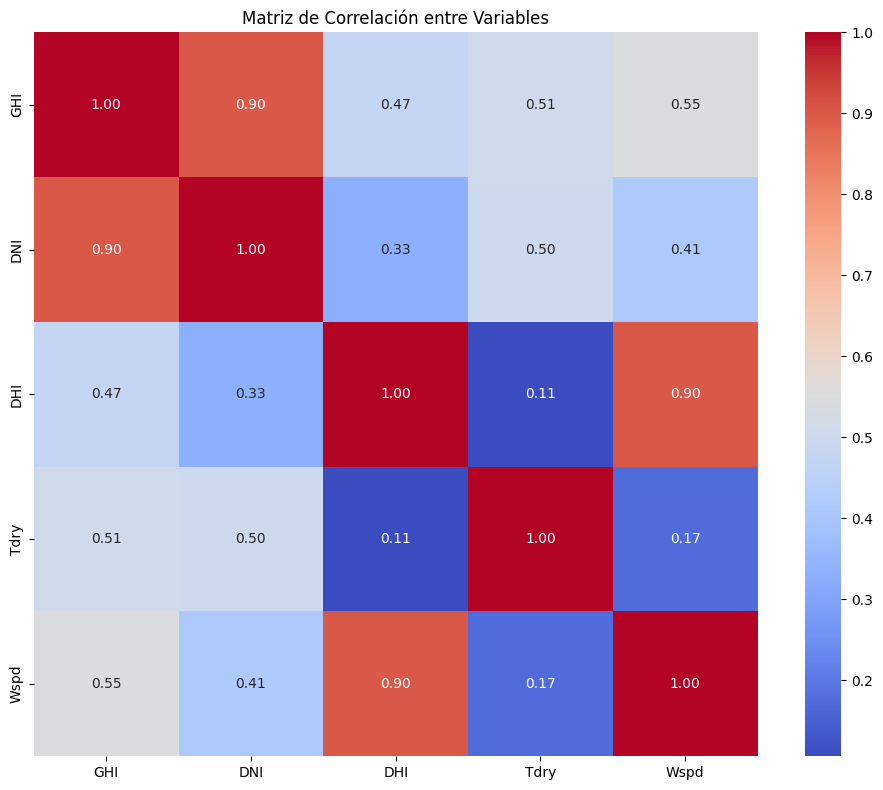

✅ Gráficos guardados en la carpeta: /home/miguelo/CLASE 3/graficos


In [17]:
# BLOQUE 2: Gráficos de Exploración sobre archivo TMY limpio

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Ruta del archivo limpio TMY
ruta_tmy = '/home/miguelo/CLASE 3/antofagasta_tmy.csv'

# Cargar datos
df_tmy = pd.read_csv(ruta_tmy)

# Convertir Timestamp
df_tmy['Timestamp'] = pd.to_datetime(df_tmy['Timestamp'])

# Crear carpeta para guardar gráficos
carpeta_guardado = '/home/miguelo/CLASE 3/graficos'
os.makedirs(carpeta_guardado, exist_ok=True)

# --- Gráfico 1: Serie anual de GHI (Formato TMY)
plt.figure(figsize=(14, 6))
plt.plot(df_tmy['Timestamp'], df_tmy['GHI'], label='GHI', color='orange')
plt.xlabel('Fecha (Año típico)')
plt.ylabel('Irradiancia GHI [W/m²]')
plt.title('Serie Anual de Irradiancia Global Horizontal (Formato TMY)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig(f'{carpeta_guardado}/serie_anual_GHI_TMY.png')
plt.show()

# --- Gráfico 2A: Histograma de GHI (todos los datos)
plt.figure(figsize=(10, 6))
plt.hist(df_tmy['GHI'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('GHI [W/m²]')
plt.ylabel('Frecuencia')
plt.title('Histograma de Irradiancia Global Horizontal (todos los datos)')
plt.grid(True)
plt.tight_layout()
plt.savefig(f'{carpeta_guardado}/histograma_GHI_completo_TMY.png')
plt.show()

# --- Gráfico 2B: Histograma solo GHI > 0
df_ghi_solar = df_tmy[df_tmy['GHI'] > 0]

plt.figure(figsize=(10, 6))
plt.hist(df_ghi_solar['GHI'], bins=50, color='lightgreen', edgecolor='black')
plt.xlabel('GHI [W/m²]')
plt.ylabel('Frecuencia')
plt.title('Histograma de Irradiancia Global Horizontal (solo GHI > 0)')
plt.grid(True)
plt.tight_layout()
plt.savefig(f'{carpeta_guardado}/histograma_GHI_sol_TMY.png')
plt.show()

# --- Gráfico 3: Matriz de Correlación entre Variables
columnas_corr = ['GHI', 'DNI', 'DHI', 'Tdry', 'Wspd']
matriz_corr = df_tmy[columnas_corr].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Matriz de Correlación entre Variables')
plt.tight_layout()
plt.savefig(f'{carpeta_guardado}/matriz_correlacion_TMY.png')
plt.show()

print(f"✅ Gráficos guardados en la carpeta: {carpeta_guardado}")
